# Introducing the AlphaSynth and BetaSynth models

The components of our architecture rest upon various __deep neural networks techniques__. 
Neural networks were introduced in the mid 1980s and they marked a shift in predictive modeling towards computer science and machine learning. A neural network is a __highly parametrized model__, that was widely promoted as a universal approximator --- a machine that with enough data could learn any smooth predictive relationship. Since the introduction there has been a plethora of architectures proposed for various supervised and unsupervised tasks.

For the problem of synthetic data generation, we have identified a hybrid architecture that combines  novel  approaches of generative deep learning modelling. The first component of the architecture allows to produce snapshots of the data for __short period horizons from a few days to one month__ and is called <font color=green>__AlphaSynth__</font> whereas the second component allows to produce __dynamic long period horizons from one month to one year__ for a specific user based on a snapshot from the first component and is called <font color=blue>__BetaSynth__</font>.
It turns out these __hyperparameters can effectively be chosen based solely upon the data at hand__. In a formal statistical language, this means that the architecture is __adaptive__ to the data! Furthermore, this approach inherits the main advantages of __Bayesian modelling__ both effectively capturing the distributions and regularising the model to __avoid overfitting__, which is vital to __preserve privacy and ensure stability__ of the model.


__Notebook purpose__:

Using the our test datasets, this notebook will demonstrate the efficacy of our constraints-preserving pipelines.

In [ ]:
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import Synthesized
import pandas as pd

# this is our seed
seed = 42

# show versions for continuity
print("TensorFlow version: %s" % tf.__version__)
print("NumPy version: %s" % np.__version__)
print("Synthesized version: %s" % Synthesized.__version__)

# Loading data

In [2]:
from Synthesized.modules import *

pipeline = DataPipeline()
pipeline.load_from_csv("~/transactions.csv")
pipeline.CrudeDataSet.head(10)

,Unnamed: 0,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,mean_income
0,0,695247,2378,1993-01-01,1,2.0,700.0,700.0,NaN,NaN,NaN,[ 11271.53754941]
1,1,695250,2378,1993-01-22,1,2.0,7268.0,7968.0,NaN,NaN,NaN,[ 11271.53754941]
2,2,695266,2378,1993-01-23,1,2.0,14440.0,22408.0,NaN,NaN,NaN,[ 11271.53754941]
3,3,695262,2378,1993-01-24,1,2.0,49752.0,72160.0,NaN,NaN,NaN,[ 11271.53754941]
4,4,695265,2378,1993-01-26,1,2.0,21899.0,94059.0,NaN,NaN,NaN,[ 11271.53754941]
5,5,695560,2378,1993-01-31,0,3.0,34700.0,59453.7,NaN,NaN,NaN,[ 11271.53754941]
6,6,3608592,2378,1993-01-31,1,NaN,94.7,94153.7,2,NaN,NaN,[ 11271.53754941]
7,7,695272,2378,1993-02-05,1,2.0,30192.0,89645.7,NaN,NaN,NaN,[ 11271.53754941]
8,8,695340,2378,1993-02-07,0,0.0,9612.0,80033.7,4,EF,1222903.0,[ 11271.53754941]
9,9,695270,2378,1993-02-11,1,2.0,31038.0,111071.7,NaN,NaN,NaN,[ 11271.53754941]


In [3]:
pipeline.CrudeDataSet.head(100)

,Unnamed: 0,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,mean_income
0,0,695247,2378,1993-01-01,1,2.0,700.0,700.0,NaN,NaN,NaN,[ 11271.53754941]
1,1,695250,2378,1993-01-22,1,2.0,7268.0,7968.0,NaN,NaN,NaN,[ 11271.53754941]
2,2,695266,2378,1993-01-23,1,2.0,14440.0,22408.0,NaN,NaN,NaN,[ 11271.53754941]
3,3,695262,2378,1993-01-24,1,2.0,49752.0,72160.0,NaN,NaN,NaN,[ 11271.53754941]
4,4,695265,2378,1993-01-26,1,2.0,21899.0,94059.0,NaN,NaN,NaN,[ 11271.53754941]
5,5,695560,2378,1993-01-31,0,3.0,34700.0,59453.7,NaN,NaN,NaN,[ 11271.53754941]
6,6,3608592,2378,1993-01-31,1,NaN,94.7,94153.7,2,NaN,NaN,[ 11271.53754941]
7,7,695272,2378,1993-02-05,1,2.0,30192.0,89645.7,NaN,NaN,NaN,[ 11271.53754941]
8,8,695340,2378,1993-02-07,0,0.0,9612.0,80033.7,4,EF,1222903.0,[ 11271.53754941]
9,9,695270,2378,1993-02-11,1,2.0,31038.0,111071.7,NaN,NaN,NaN,[ 11271.53754941]


## Preprocess the database

Data preprocessing is an essential step for conducting any statistical inference. As our main 
objective is to generate  synthetic data that convey a fundamental information about original data, it is vital to clean  original data from any disturbances that may dilute important information. In banking applications, a typical example of disturbances in original data is a sudden tiny transaction in response to an unexpected situation. Our solution thus naturally exploits the following preprocessing steps: __normalisation and scalings__, __eliminating  small values__, typically the values less than 5\% of the average spendings of a customer, __extracting key clusters__ and __identifying key time horizons__.

In [4]:
#targetDataSe
feature_list = ["account_id", "date", "operation", "amount"]
pipeline.preprocess_crude_dataset(feature_list)

#targetDataSe
targetDataSet = pipeline.targetDataSet
targetDataSet.columns = ['seqId', 'date', 'category', 'value']
targetDataSet.head(100)


,seqId,date,category,value
0,2378,1993-01-01,2.0,700.0
1,2378,1993-01-22,2.0,7268.0
2,2378,1993-01-23,2.0,14440.0
3,2378,1993-01-24,2.0,49752.0
4,2378,1993-01-26,2.0,21899.0
5,2378,1993-01-31,3.0,34700.0
7,2378,1993-02-05,2.0,30192.0
8,2378,1993-02-07,0.0,9612.0
9,2378,1993-02-11,2.0,31038.0
10,2378,1993-02-11,3.0,25200.0


In [5]:
pipeline.prepare_dataset_for_training() 
#this function prepares targetDataSet stored in the pipeline for training

In [6]:
training_set = pipeline.training_set
training_set[0][:100]
#the resulting numpy array object is stored in the pipeline as training_set

array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.07  ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.7268,  1.444 ,  4.9752,  0.    ,  2.1899,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0. 

## Demonstrating the `AlphaSynth`

We here demonstrate some basic capabilities of the AlphaSynth module, which is able to generate synthetic data in short time horizons

In [7]:
# train test split
from sklearn.model_selection import train_test_split

all_data = np.asarray(training_set)
X_train, X_test = train_test_split(all_data, train_size=0.7, random_state=seed)

print('Training set size: (%s, %s)' % X_train.shape)
print('Testing set size: (%s, %s)' % X_test.shape)

Training set size: (5154, 128)
Testing set size: (2210, 128)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


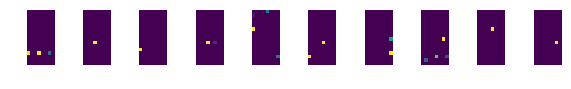

In [8]:
# matplotlib is way too into the whole "warn for everything"
import warnings

def suppress_warnings(func):
    def wrapper(*args, **kwargs):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return func(*args, **kwargs)
    return wrapper


@suppress_warnings
def showData(array_a, array_b=None, array_c=None, nrow=2, ncol=10, figsize=None, save_loc=None):
    # import without warnings
    from matplotlib import pyplot as plt
    %matplotlib inline
    
    # if both are None, just plot one
    if array_b is None and array_c is None:
        nrow = 1
        
    # if kw specifically makes B None, shift it over
    elif array_b is None:
        array_b = array_c
        array_c = None
        nrow = 2
        
    # otherwise if just plotting the first two...
    elif array_c is None:
        nrow = 2
        
    elif array_b is not None and array_c is not None:
        nrow = 3
        
    if nrow not in (1, 2, 3):
        raise ValueError('nrow must be in (1, 2)')
        
    if figsize is None:
        figsize = (ncol, nrow)
        
    f, a = plt.subplots(nrow, ncol, figsize=figsize)
    arrays = [array_a, array_b, array_c]
    
    def _do_show(the_figure, the_array):
        the_figure.imshow(the_array)
        the_figure.axis('off')
    
    for i in range(ncol):
        if nrow > 1:
            for j in range(nrow):
                _do_show(a[j][i], np.reshape(arrays[j][i], (16, 8)))
        else:
            _do_show(a[i], np.reshape(array_a[i], (16, 8)))
            
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    f.show()
    plt.draw()
    
    # if save...
    if save_loc is not None:
        plt.savefig(save_loc)
    
# draw some:
showData(X_train)

## Show some key statistics of orginal dataset

In [41]:
training_set = pipeline.get_aggregated_dataset_for_snapshot_generation(targetDataSet, 3, 4)


In [42]:
training_set[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   7.00000000e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.14000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.07700000e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [43]:
all_data = np.asarray(training_set)
X_train, X_test2 = train_test_split(all_data, train_size=0.7, random_state=seed)

In [44]:
all_data[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   7.00000000e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.14000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         7.07700000e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [45]:
#outlierDataSet = pipeline.get_outlier_dataset()
#training_set = pipeline.get_aggregated_dataset_for_snapshot_generation(outlierDataSet, 3, 4)

In [47]:
len(training_set[1])

384

In [9]:
from Synthesized.modules import AlphaSynth
from sklearn.metrics import mean_squared_error

# define the estimator. We will use L2 penalty to augment the generalizability of the encoder
alpha = AlphaSynth(n_epochs=100, n_hidden=250, learning_rate=0.01, batch_size=106, 
                 display_step=10, activation_function='relu', verbose=2, min_change = 1e-6, 
                 random_state=seed, clip=True, l2_penalty=1e-5, 
                 early_stopping=True)

# fit
alpha.fit(X_train)

# transform and reconstruct the test images
reconstructed = alpha.feed_forward(X_test)

# get the error:
mse = ((X_test - reconstructed) ** 2).sum(axis=1).sum() / X_test.shape[0]
print("\nTest MSE: %.4f" % mse)

Epoch: 1, cost=0.053439, time=0.1989 (sec)
Epoch: 11, cost=0.009906, time=0.1500 (sec)
Epoch: 21, cost=0.009778, time=0.1493 (sec)
Epoch: 31, cost=0.011298, time=0.1451 (sec)
Epoch: 41, cost=0.012567, time=0.1530 (sec)
Epoch: 51, cost=0.010566, time=0.1613 (sec)
Epoch: 61, cost=0.011581, time=0.1469 (sec)
Epoch: 71, cost=0.010097, time=0.1442 (sec)
Epoch: 81, cost=0.010315, time=0.1955 (sec)
Epoch: 91, cost=0.010088, time=0.1560 (sec)
Optimization complete after 100 epoch(s). Average epoch time: 0.1581 seconds

Test MSE: 1.1951


In [ ]:
reconstructed[0]

In [ ]:
X_test[0]

In [84]:
reconstructed = [i.reshape(32,12) for i in reconstructed]
compressedDataSet = pipeline.compress_dataset(reconstructed, 3, 4)

In [85]:
compressedDataSet[0]

,1,2,3,4
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,2.33071,0,0
6,0,0,0,0
7,0,0.0244604,0,0
8,0,0,0,0
9,0,0,0,0
10,0,0,0,0


In [86]:
reconstructed2 = [np.asarray(a).flatten() for a in compressedDataSet]

In [87]:
reconstructed2[0].shape

(128,)

## Fit and reconstruct using `AlphaSynth`



In [8]:
from Synth.modules import AlphaSynth2
from sklearn.metrics import mean_squared_error



# define the estimator. We will use L2 penalty to augment the generalizability of the encoder
alpha = AlphaSynth2(n_epochs=100, n_hidden=250, n_latent_factors=10, 
                                   learning_rate=0.02, batch_size=106, display_step=10, 
                                   activation_function='relu', verbose=2, l2_penalty=None,
                                   random_state=seed, early_stopping=True, dropout=1, min_change = 1e-6,
                                   learning_function='adam', clip=False,n_latent_factors = 100)

# fit
alpha.fit(X_train)

# transform and reconstruct the test images
reconstructed = alpha.generate_from_sample(X_test)

# get the error:
mse = ((X_test - reconstructed) ** 2).sum(axis=1).sum() / X_test.shape[0]
print("\nTest MSE: %.4f" % mse)

Epoch: 1, cost=11.541815, time=0.3669 (sec)
Epoch: 11, cost=11.044977, time=0.2385 (sec)
Epoch: 21, cost=10.615894, time=0.2552 (sec)
Epoch: 31, cost=10.632393, time=0.2343 (sec)
Epoch: 41, cost=10.690940, time=0.3141 (sec)
Epoch: 51, cost=10.664414, time=0.2800 (sec)
Epoch: 61, cost=10.607556, time=0.2489 (sec)
Epoch: 71, cost=10.684998, time=0.2443 (sec)
Epoch: 81, cost=10.778146, time=0.2470 (sec)
Epoch: 91, cost=10.653921, time=0.2626 (sec)
Optimization complete after 100 epoch(s). Average epoch time: 0.2600 seconds

Test MSE: 6.2715


In [48]:
reconstructed = alpha.generate(2210)

In [40]:
b[5]== b[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [90]:
len(X_test)

1367

In [131]:
X_train.shape

(5154, 128)

In [126]:
X_train[1]

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ]

In [111]:
reconstructed = [alpha.generate_from_sample([i]) for i in X_test]



In [93]:
def filter_out_small_values(list_of_arrays, barrier):
    for arr in list_of_arrays:
        arr[arr < barrier] = 0
    return(list_of_arrays)

new_array = filter_out_small_values(reconstructed2, barrier = 0.005)

In [65]:
reconstructed2[1100]typ

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.69608092, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.1172285, 0.28512415, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.03417556, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0], dtype=object)

## Show synthesized examples:

Top row is canonical; bottom row is synthesized.

In [81]:
reconstructed2[-1]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

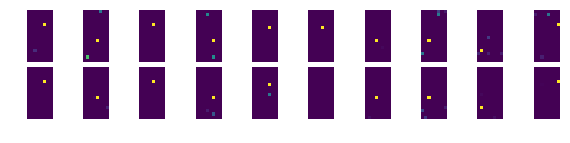

In [10]:
showData(X_test, reconstructed)

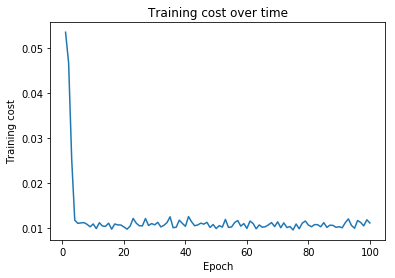

In [12]:
# show training errors
@suppress_warnings
def plot_training_error(estimator):
    # import without warnings
    from matplotlib import pyplot as plt
    %matplotlib inline
    
    c = estimator.epoch_costs_
    plt.plot(np.arange(len(c)) + 1, c)
    plt.title('Training cost over time')
    plt.ylabel('Training cost')
    plt.xlabel('Epoch')
    plt.show()
    
plot_training_error(alpha)

## Tests to confirm the utility of synthetic data 

In developing innovative generative models one typically needs to compare one model to another in order to demonstrate that a newly invented generative model is better at capturing some distribution than the pre-existing models.
This appears to be a difficult and subtle task. It is in fact impossible to evaluate the log probability of the data under the model and only an approximation is available. It is therefore important to think and communicate clearly about exactly what is being measured. For example, suppose we can evaluate a stochastic estimate of the log-likelihood for model *A*, and a deterministic lower bound on the log-likelihood for model *B*. If model *A* gets a higher score than model *B*, which is better? If we care about determining which model has a better internal representation of the distribution, it is actually impossible to tell, unless there is a way of determining how loose the bound for model *B* is. However, if we care about how well we can use the model in practice, for example to perform anomaly detection, then it is fair to say that a model is preferable based on a criterion specific to the practical task of interest, e.g., based on ranking test examples and ranking criteria such as precision and recall. 

**We here collect some of the tests we have devised and conducted for ensuring the utility of synthetic data.**

In [12]:
from Synthesized.testing import TestingEnvironment
testingEnvironment = TestingEnvironment()

As the main target of synthetic data is to mimic real data in a way that all the key features of the original dataset are preserved, we are essentially modelling  **a very complex high-dimensional distribution**. It is evident that testing how good we are able to approximate the high-dimensional distribution is a daunting technical hurdle. Nonetheless,  it appears possible to test the fit of the synthetic dataset to the original dataset based on one-dimensional distributions ---  **projections of the main distribution onto different subspaces.**

In [32]:
len([np.asarray(i).flatten() for i in compressedDataSet][0])

128

In [16]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [13]:
#testingEnvironment.compare_empirical_densities(X_test, [np.asarray(i).flatten() for i in compressedDataSet], 35)
testingEnvironment.compare_empirical_densities(X_test, reconstructed, 36)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


The sum of values in the field 36 of synthesized data is 72.5702836439
The sum of values in the field 36 of original data is 83.6324
